In [2]:
import mglearn

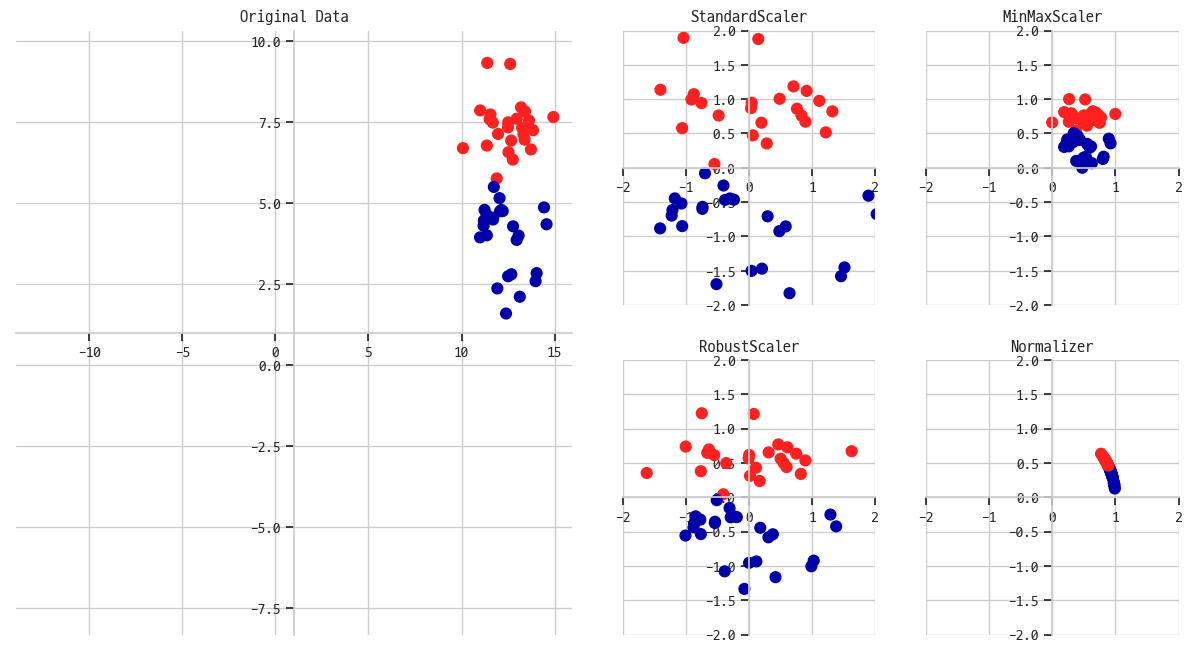

In [3]:
mglearn.plots.plot_scaling()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
X_train[:5]

array([[1.522e+01, 3.062e+01, 1.034e+02, 7.169e+02, 1.048e-01, 2.087e-01,
        2.550e-01, 9.429e-02, 2.128e-01, 7.152e-02, 2.602e-01, 1.205e+00,
        2.362e+00, 2.265e+01, 4.625e-03, 4.844e-02, 7.359e-02, 1.608e-02,
        2.137e-02, 6.142e-03, 1.752e+01, 4.279e+01, 1.287e+02, 9.150e+02,
        1.417e-01, 7.917e-01, 1.170e+00, 2.356e-01, 4.089e-01, 1.409e-01],
       [1.496e+01, 1.910e+01, 9.703e+01, 6.873e+02, 8.992e-02, 9.823e-02,
        5.940e-02, 4.819e-02, 1.879e-01, 5.852e-02, 2.877e-01, 9.480e-01,
        2.171e+00, 2.487e+01, 5.332e-03, 2.115e-02, 1.536e-02, 1.187e-02,
        1.522e-02, 2.815e-03, 1.625e+01, 2.619e+01, 1.091e+02, 8.098e+02,
        1.313e-01, 3.030e-01, 1.804e-01, 1.489e-01, 2.962e-01, 8.472e-02],
       [1.468e+01, 2.013e+01, 9.474e+01, 6.845e+02, 9.867e-02, 7.200e-02,
        7.395e-02, 5.259e-02, 1.586e-01, 5.922e-02, 4.727e-01, 1.240e+00,
        3.195e+00, 4.540e+01, 5.718e-03, 1.162e-02, 1.998e-02, 1.109e-02,
        1.410e-02, 2.085e-03, 1.907e

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
X_train_scaled = scaler.transform(X_train)

In [14]:
X_train_scaled

array([[0.389938  , 0.70713561, 0.4119273 , ..., 0.80962199, 0.59957224,
        0.91755006],
       [0.37763264, 0.31755157, 0.36790823, ..., 0.51168385, 0.33174905,
        0.31598672],
       [0.36438071, 0.35238417, 0.35208348, ..., 0.55292096, 0.3476711 ,
        0.28857479],
       ...,
       [0.48364807, 0.50084545, 0.48655933, ..., 0.65257732, 0.4151616 ,
        0.84259557],
       [0.3336173 , 0.3902604 , 0.31787713, ..., 0.27364261, 0.15684411,
        0.22443516],
       [0.28628899, 0.29455529, 0.26826066, ..., 0.17226804, 0.10004753,
        0.06938644]])

In [15]:
X_test_scaled = scaler.transform(X_test)

### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기
- 지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요하다.
- 다음 예에서는 이와 반대로, 테스트 세트의 최솟값과 범위를 사용했을 때 어떤 일이 일어나는지 보여준다.

In [16]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

Text(0.5, 1.0, '잘못 조정된 데이터')

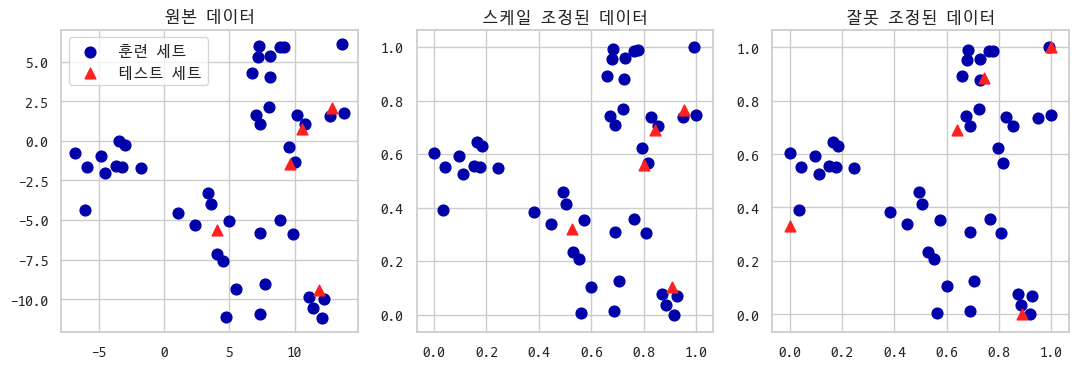

In [23]:
# 훈련 세트와 테스트 세트의 산점도를 그린다.
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정한다.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그린다.
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정한다.
# 테스트 세트의 최솟값은 0, 최댓값은 1이 된다.
# 이는 예제를 위한 것으로, 절대로 이렇게 사용해서는 안된다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그린다.
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[2].set_title("잘못 조정된 데이터")

In [33]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [34]:
print(X_train.shape); print(y_train.shape)

(426, 30)
(426,)


In [35]:
print(X_test.shape)
print(y_test.shape)

(143, 30)
(143,)


In [36]:
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


### MinMaxScaler를 사용해 데이터의 스케일을 조정한다.

In [37]:
# 0 ~ 1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


### PCA

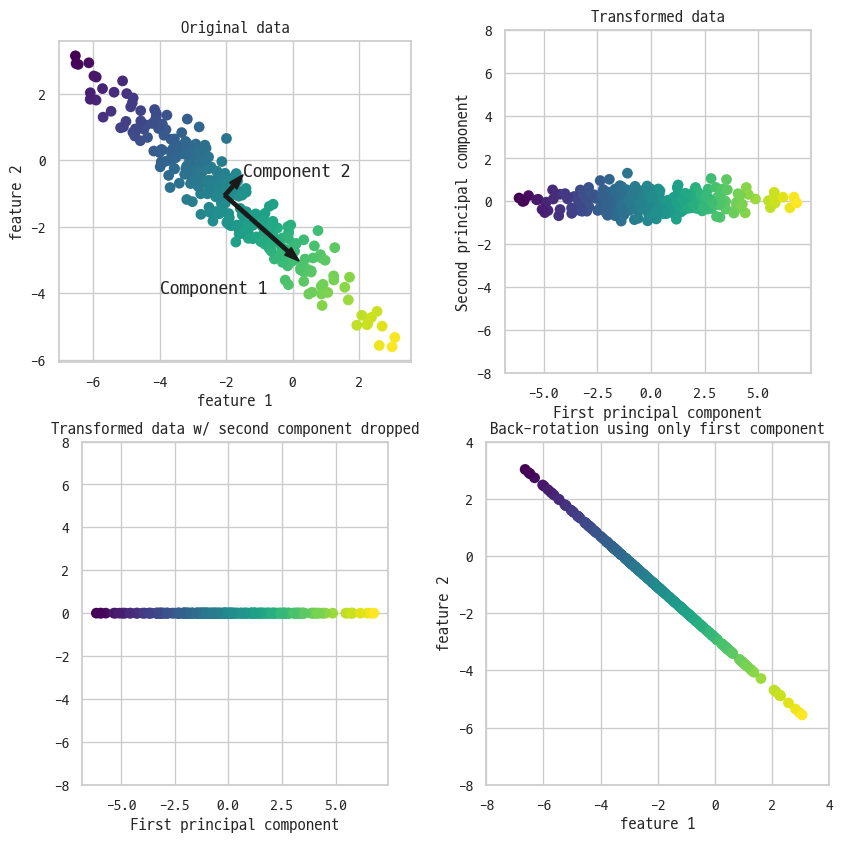

In [44]:
mglearn.plots.plot_pca_illustration()

### PCA를 적용해 유방암 데이터셋 시각화하기
- 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그린다.

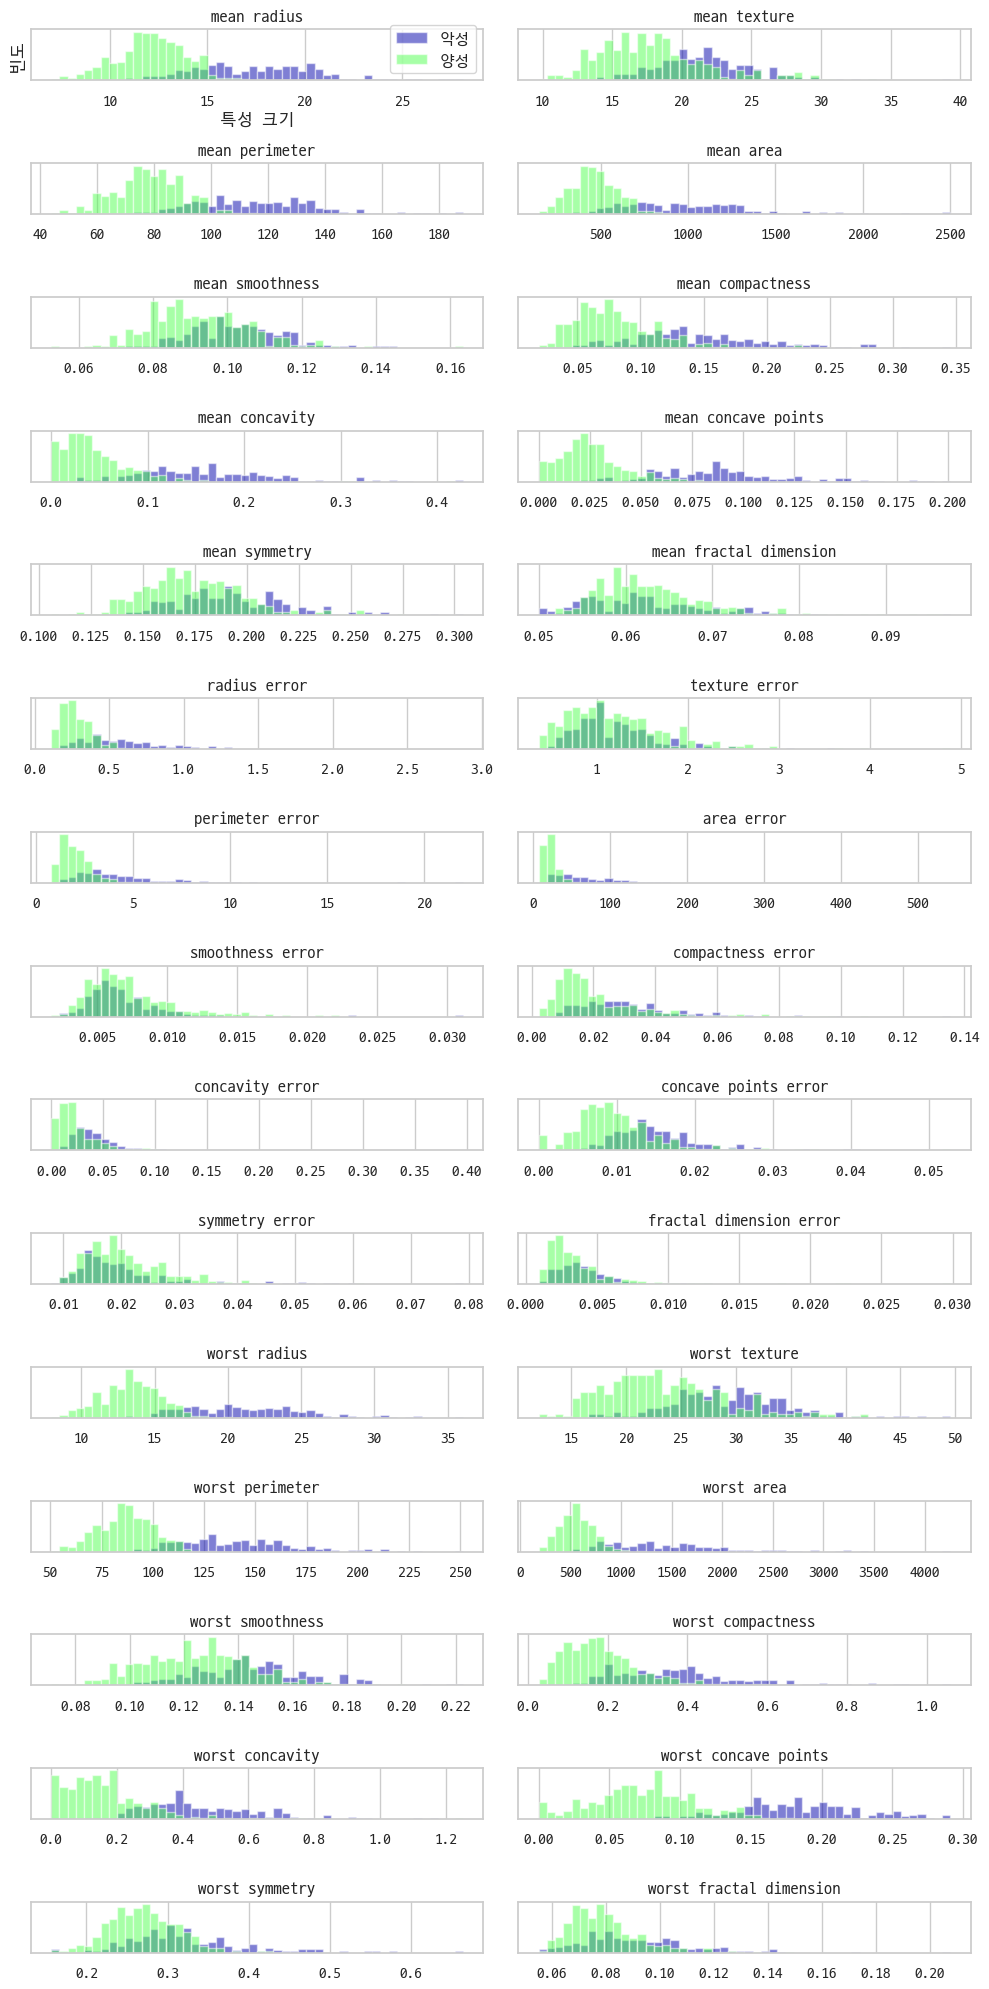

In [47]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

### PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정한다.
- 특성의 스케일이 서로 다르면 올바른 주성분 방향을 찾을 수 없으니 PCA를 사용할 때는 표준값으로 바꿔야 한다.

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [26]:
from sklearn.decomposition import PCA

In [52]:
# 데이터의 처음 두 개의 주성분만 유지한다.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만든다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환한다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


### 맨 처음 두개의 주성분을 그린다.

Text(0, 0.5, '두 번째 주성분')

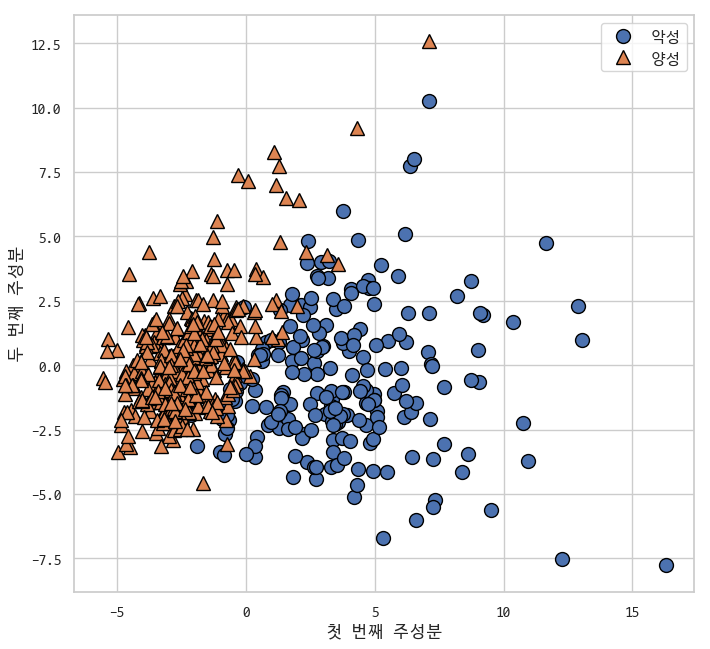

In [55]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 그린다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

### 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다.
- PCA 객체가 학습될 때 components_ 속성에 주성분이 저장된다.

In [57]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


In [58]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

### 주성분 히트맵 시각화

Text(0, 0.5, '주성분')

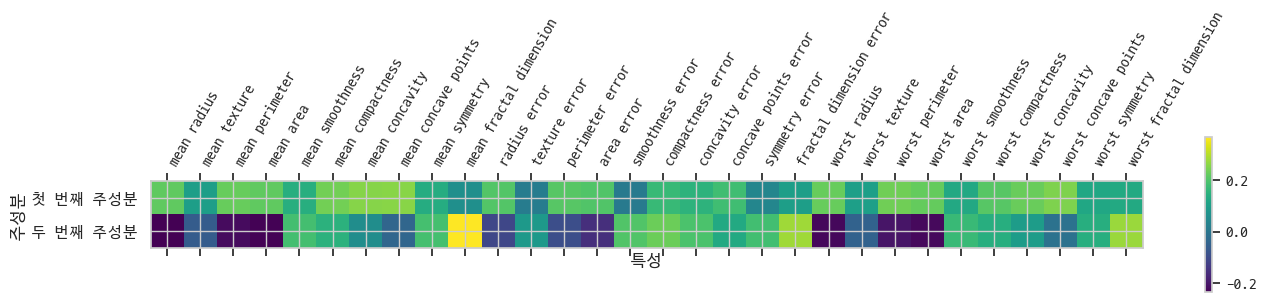

In [68]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

### 고유얼굴(eigenface) 특성 추출

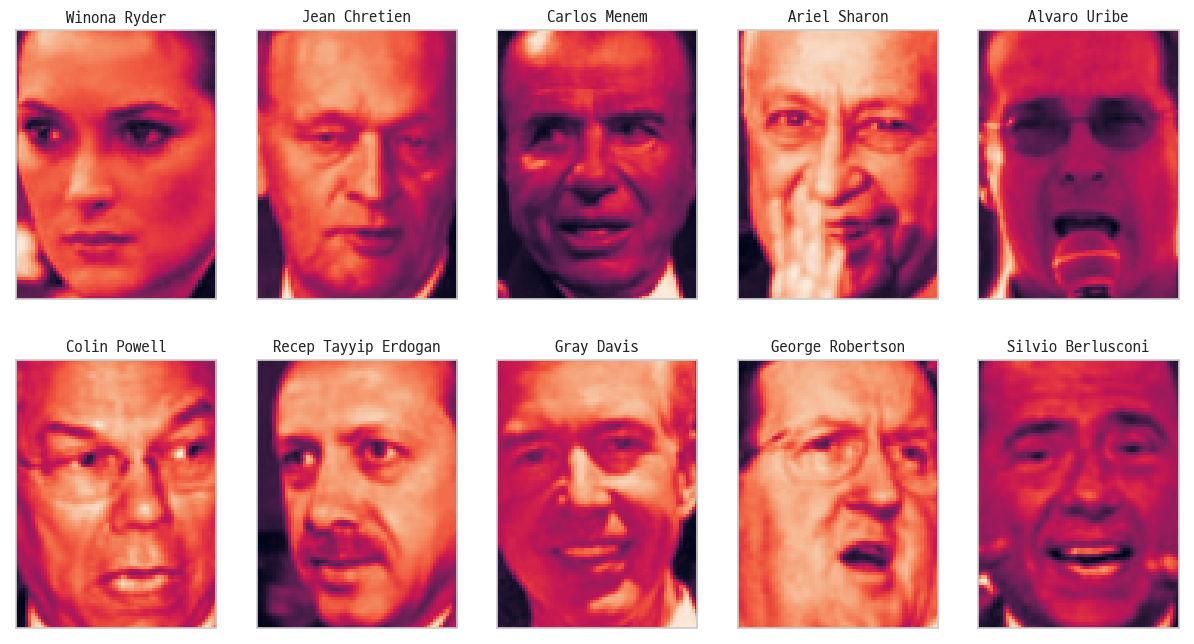

In [1]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [3]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [6]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택한다.

In [19]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

In [20]:
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

- 얼굴 인식이라 하면 통상적으로 새로운 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중 하나에 속하는 작업이다.
- 사진 애플리케이션, 소셜 미디어, 보안 애플리케이션들이 이에 속한다.
- 해결 방법 중 하나는 각 사람을 서로 다른 클래스로 구분하는 분류기를 만드는 것이다.
- 하지만 보통 얼굴 데이터베이스에는 사람의 수는 많지만 각 사람에 대한 이미지는 적다. (클래스별 훈련 데이터가 너무 적다)
- 이런 문제 때문에 대부분의 분류기를 훈련 시키기 어렵다. 
- 그리고 대규모 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수 있어야 한다.
- 간단한 방법으로, 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 1-최근접 이웃 분류기를 사용할 수 있다.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만든다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


In [23]:
import mglearn

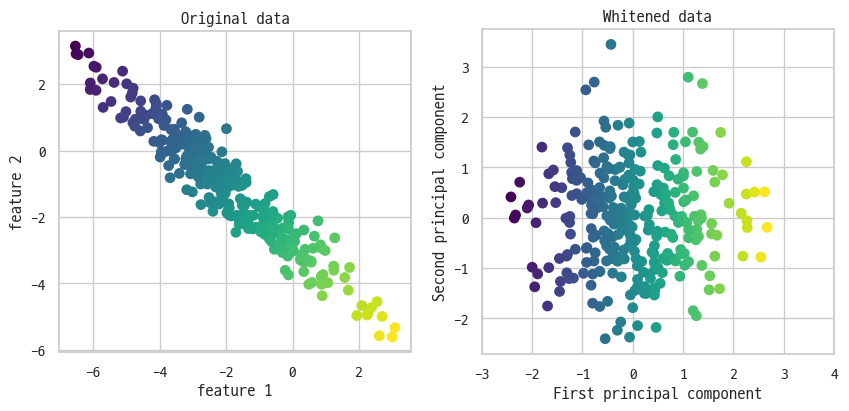

In [24]:
mglearn.plots.plot_pca_whitening()

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


새 데이터는 처음 100개의 주성분에 해당하는 특성을 갖는다.  
이제 이 데이터를 사용해 1-최근접 이웃 분류기로 이미지를 분류한다.

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


몇 개의 주성분 확인하기

pca.components_.shape: (100, 5655)


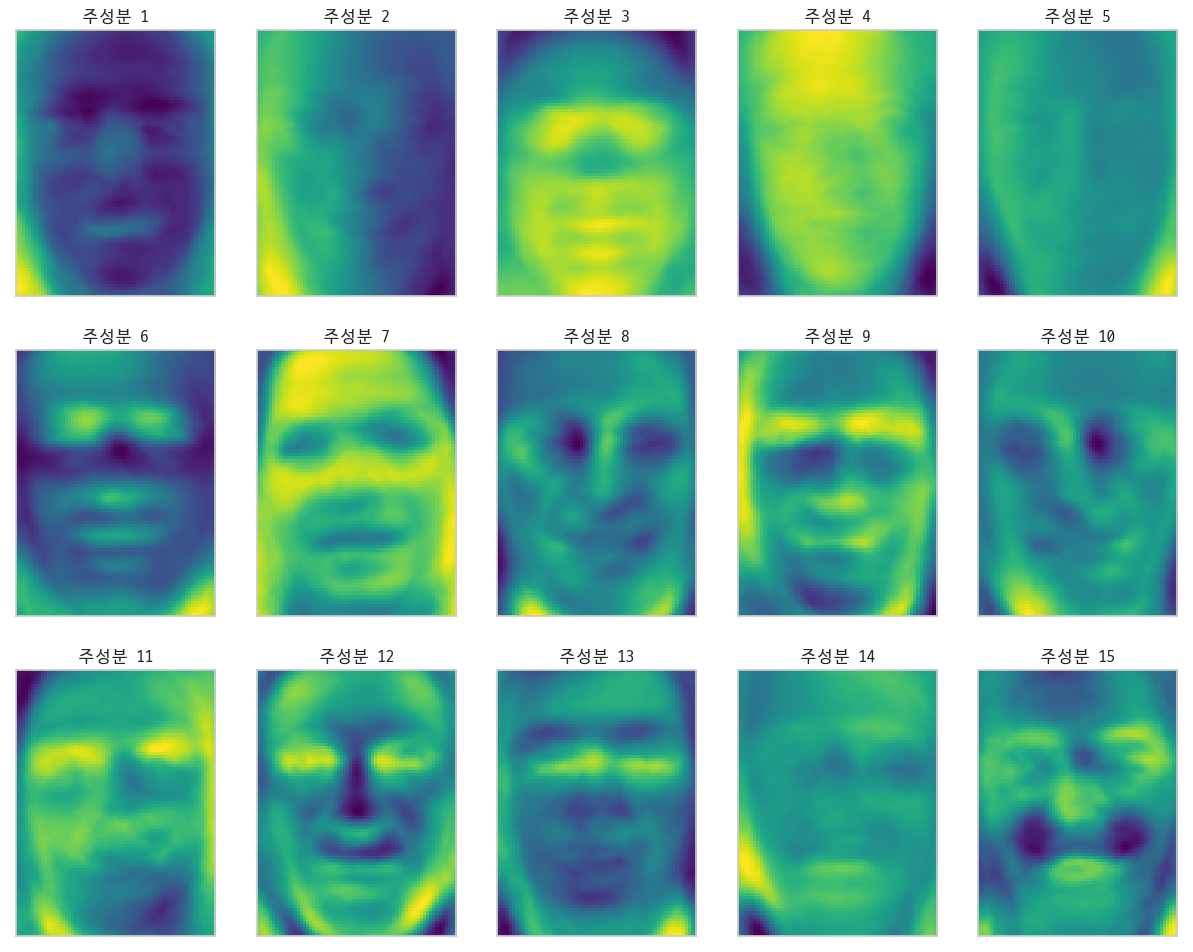

In [30]:
print("pca.components_.shape: {}".format(pca.components_.shape))
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.8s, 0.0min


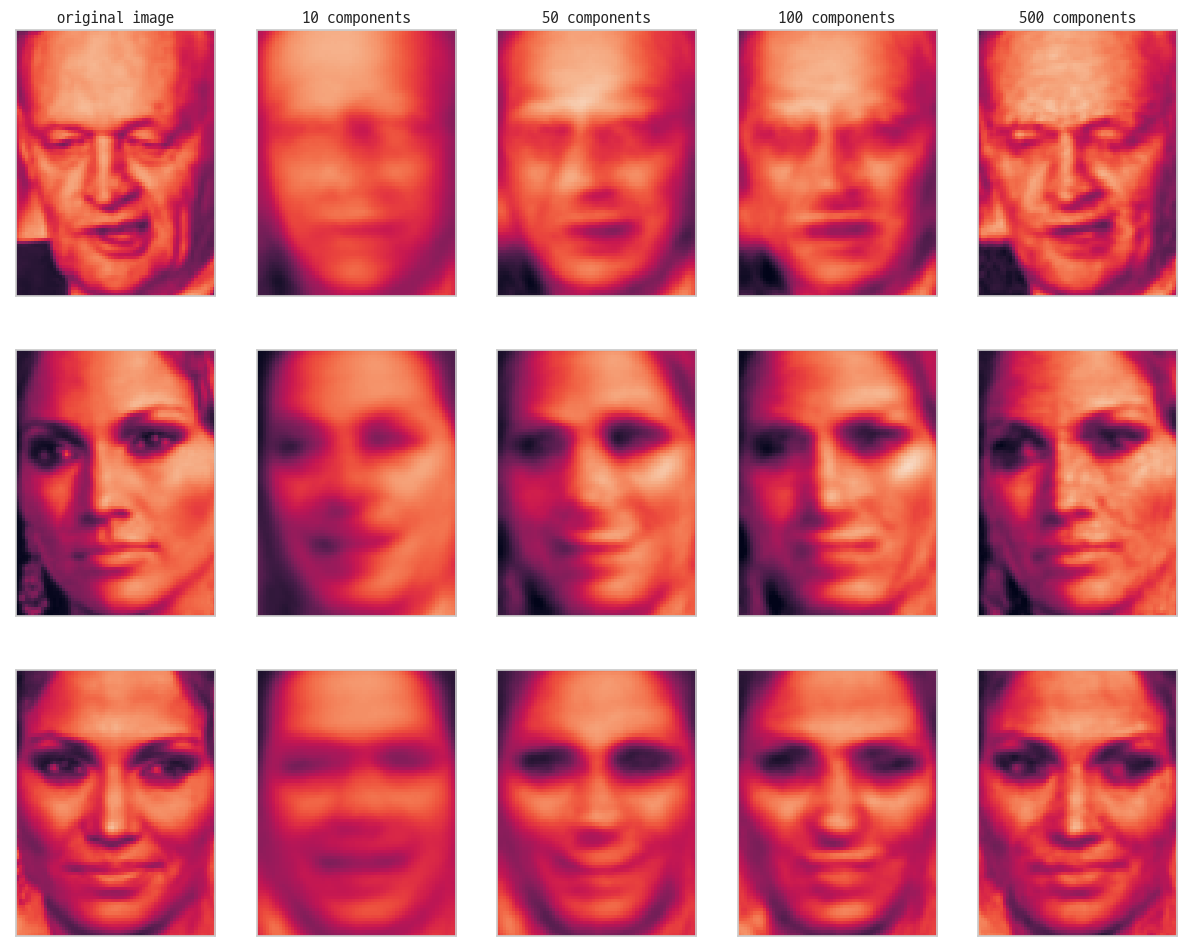

In [31]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두 번째 주성분')

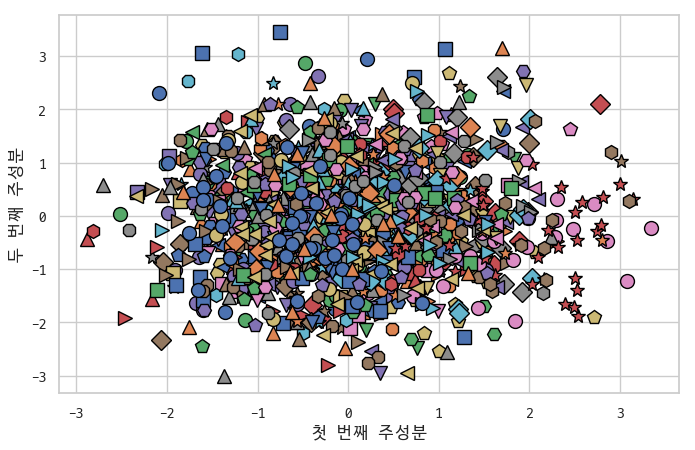

In [33]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

### 붓꽃 데이터의 차원 축소
Scikit-Learn의 붓꽃 데이터 중에서 10송이의 데이터, 즉 10개의 표본만 선택하여 꽃잎의 길이와 꽃잎의 폭 데이터를 그래프로 보이면 다음과 같다.

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10 # 앞의 10 송이만 선택
X = iris.data[:N, :2] # 꽃잎의 길이와 꽃잎의 폭만 선택

In [36]:
X.T

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1]])

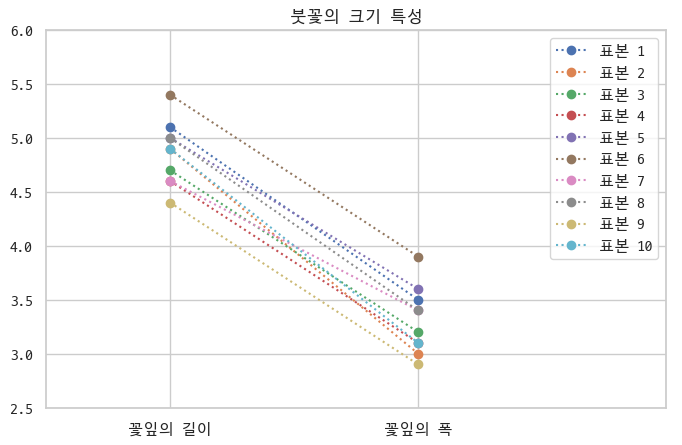

In [34]:
plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃잎의 길이","꽃잎의 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃의 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()